Hunter Bennett | Glass Lab | Kupffer Strains Project | April 27 2021  

This series of notebooks is for manuscript preparation of "final" figures for import into Adobe Illustrator.

This notebook in particular prepares a panel showing that leptin treatment induces BALBcJ specific gene expression.

In [152]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
### imports ###
import sys
%matplotlib inline
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

# import custom functions
import sys
sys.path.insert(0, '/home/h1bennet/code/')
from hbUtils import ngs_qc, quantile_normalize_df
from plotting_scripts import label_point, pca_rpkm_mat, get_diff_volcano, gene_list_bar_plot
from homer_preprocessing import read_annotated_peaks, import_homer_diffpeak, pull_comparisons_get_diff

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [153]:
workingDirectory = '/home/h1bennet/strains_rna/results/10_Strains_Manuscript_Prep/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)

In [154]:
#### PLOTTING PARAMETERS FOR MANUSCRIPT ####
# # get matplotlib to save readable fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.size'] = 6
matplotlib.rcParams['savefig.dpi'] = 500

# line widths
matplotlib.rcParams['axes.linewidth'] = 1
matplotlib.rcParams['xtick.major.width'] = 1
matplotlib.rcParams['ytick.major.width'] = 1

# adjust defualt color for plots to black
# normal default is a dark gray
COLOR = 'black'
matplotlib.rcParams['text.color'] = COLOR
matplotlib.rcParams['axes.labelcolor'] = COLOR
matplotlib.rcParams['xtick.color'] = COLOR
matplotlib.rcParams['ytick.color'] = COLOR
matplotlib.rcParams['axes.edgecolor'] = COLOR

#### PLOT PARAMETERS FOR THIS PLOT ####

# Define plotting function

In [155]:
def gene_list_bar_plot_illus(genes, data, groups,
                             group_labels, colors, width=0.5,
                             spacing=0.0, title='', ylabel='', xlabel='',
                             xticklabels=[],
                             ax=None):
    '''This function allows for visualization of expression in qPCR style
    bar plots for multiple genes contained in an rpkm data file.
    
        Accepts:
            genes (str): list of geneIDs to plot
            data (pandas DataFrame): dataset in gene x sample format with geneIDs as index
            groups (int): groups of samples in the columns of data
            group_labels (str): labels of each group in groups
            colors (str) = colors of each group in groups
            width (float) = width of bars to plot, default 0.5
            spacing (float) = extra spacing between bars to plot, default 0.0
            relative (bool) = whether to standardize plot so that first group mean is 1,
            ax (matplotlib.Axes object) = plot axis
        
        Returns:
            ax (matplotlib.Axes object) = gene list bar plot'''

    import pandas as pd
    import matplotlib.pyplot as plt    
    import numpy as np

    # calculate means and standard deviations for plotting
    # adjust if using a relative method (control group set to 1)
    # get mean and std
    means = []
    stds = []
    for (group, label) in zip(groups, group_labels):
        means.append(data.iloc[:, group].reindex(genes).mean(1))
        stds.append(data.iloc[:, group].reindex(genes).std(1))
    
    # set axis
    if ax==None:
        ax = plt.gca()
    

    # plot
    ind = np.arange(len(genes))
    ind = np.arange(len(genes))    # the x locations for the groups
    i = 0
    for mean, std, group, label, color in zip(means, stds, groups, group_labels, colors):
        ax.bar(ind + (width+spacing)*i,
               mean,
               width,
               color=color,
               yerr=[np.zeros(len(std)), std],
               edgecolor='k',
               linewidth=1,
               capsize=20,
               error_kw={'elinewidth':1,
                         'capthick':1,
                         'capsize':4},
               label=label)
        i+=1
        
    if len(xticklabels) > 0:
        ax.set_xticks([ind + (width+spacing)*i for i in np.arange(len(xticklabels))]);
        ax.set_xticklabels(xticklabels);
    ax.legend(fontsize=10);
    ax.set_ylabel(ylabel, fontsize=8)
    ax.set_xlabel(xlabel, fontsize=8)
    ax.set_title(title, fontsize=8)
    
    return ax

In [156]:
np.arange(0,len(['a','b','c']))

array([0, 1, 2])

# Make folder for figures

In [157]:
if not os.path.isdir('./leptin_replacement_rna_bar_plots/'):
    os.mkdir('./leptin_replacement_rna_bar_plots/')

# Import RNA-seq data

In [158]:
tpm_mat = pd.read_csv(
    '/home/h1bennet/strains_rna/results/K06b_Strains_Leptin6htoControl_Kupffer_OutliersDropped/expression/rawT.txt',
    sep='\t',
    index_col=0)

In [159]:
groups = [# [0,1],
          # [2],
          [3,4],
          # [5,6],
          [7,8],
          [9,10]
         ]

group_labels = [# 'C57BL/6J Kupffer Control young',
                # 'C57BL/6J Kupffer leptin 6 hours',
                'Balb/cJ',
                # 'Balb/cJ Kupffer leptin 6 hours',
                'A/J',
                'A/J\nLeptin',]

colors = [# '#74c476',
          # '#006d2c',
          '#6baed6',
          # '#08519c',
          '#de2d26',
          '#a50f15']

In [160]:
leptin_induced_genes = ['Ifi27l2a', 'Lgals1', 'Anxa2', 'Trem2', 'Rcan1', 'Per1']

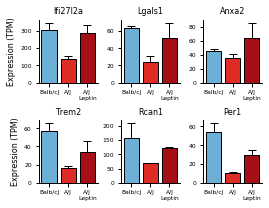

In [161]:
fig, axs = plt.subplots(2, 3, figsize=(4,3))
plt.subplots_adjust(wspace=0.4, hspace=0.6)


for gene, ax in zip(leptin_induced_genes, axs.flat):
    gene_list_bar_plot_illus([gene],
                       tpm_mat,
                       groups=groups,
                       group_labels = group_labels,
                       colors = colors,
                       xticklabels=group_labels,
                       title=gene,
                       xlabel='',
                       ylabel='',
                       spacing=0.025,
                       width = 0.10,
                       ax=ax)
    
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.get_legend().remove()
    
axs[0][0].set_ylabel('Expression (TPM)');
axs[1][0].set_ylabel('Expression (TPM)');

plt.savefig('./leptin_replacement_rna_bar_plots/aj_leptin_treatment_balb_union_genes.pdf',
            bbox_inches='tight')